In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
uber_df = pd.read_csv('Data/uber-raw-data-sep14.csv')

In [3]:
uber_df['Date/Time']

0            9/1/2014 0:01:00
1            9/1/2014 0:01:00
2            9/1/2014 0:03:00
3            9/1/2014 0:06:00
4            9/1/2014 0:11:00
                  ...        
1028131    9/30/2014 22:57:00
1028132    9/30/2014 22:57:00
1028133    9/30/2014 22:58:00
1028134    9/30/2014 22:58:00
1028135    9/30/2014 22:58:00
Name: Date/Time, Length: 1028136, dtype: object

In [4]:
uber_df['Date/Time'] = pd.to_datetime(uber_df['Date/Time'])

In [5]:
uber_df['Day'] = uber_df['Date/Time'].apply(lambda x: x.day)
uber_df['Hour'] = uber_df['Date/Time'].apply(lambda x: x.hour)
uber_df['Weekday'] = uber_df['Date/Time'].apply(lambda x: x.weekday())

uber_df.head()


,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [6]:
uber_df.iloc[0:10]

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,1,0,0
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512,1,0,0
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512,1,0,0
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512,1,0,0
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512,1,0,0


In [7]:
max_base = uber_df.value_counts('Base') == uber_df.value_counts('Base').max()
max_base

Base
B02617     True
B02598    False
B02682    False
B02764    False
B02512    False
Name: count, dtype: bool

In [8]:
bases = uber_df['Base'].unique()
len_bases = len(bases) # 5: tamaño del array
bases
#hay 5 bases

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

## <center> Let's check the number of trips per day </center>

Text(0, 0.5, 'Density of rides')

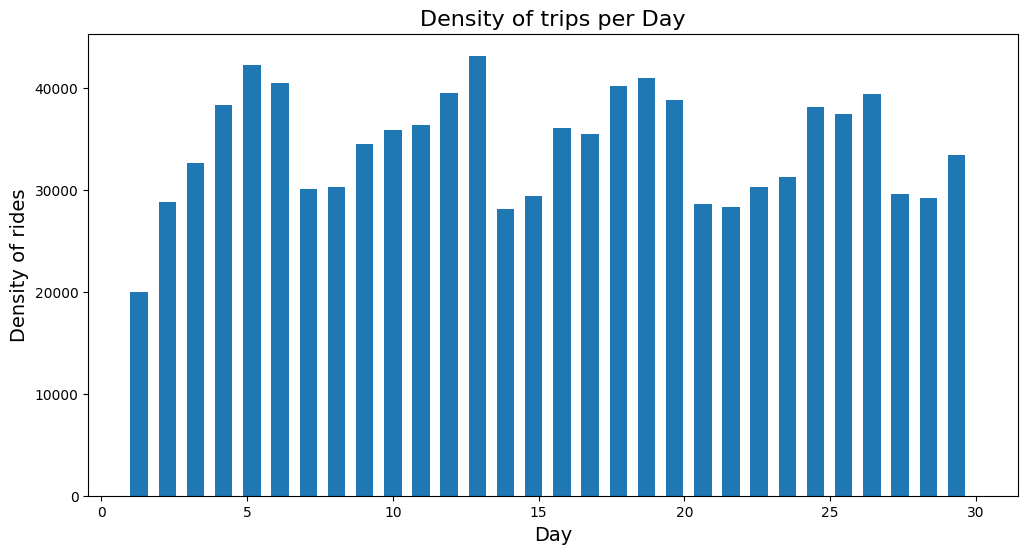

In [9]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

## <center>Now let's see which day of the week has the most trips </center>

Text(0, 0.5, 'Density of rides')

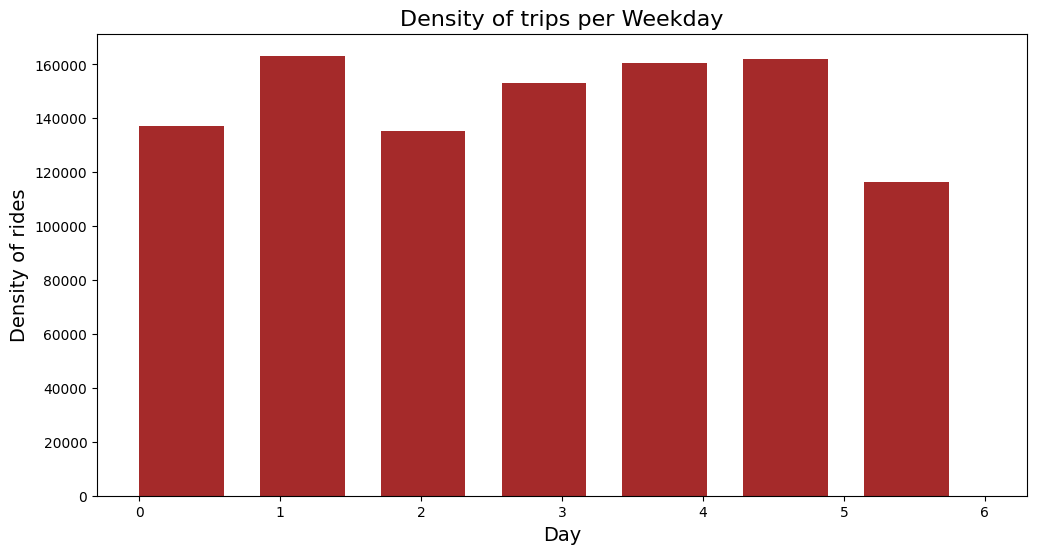

In [10]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, bins= 7, color='brown')
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### <i>As we can see, Monday appears to be the day with most trip density</i>

## <center>Now let's check performance for each base</center>

Text(0, 0.5, 'Density of rides')

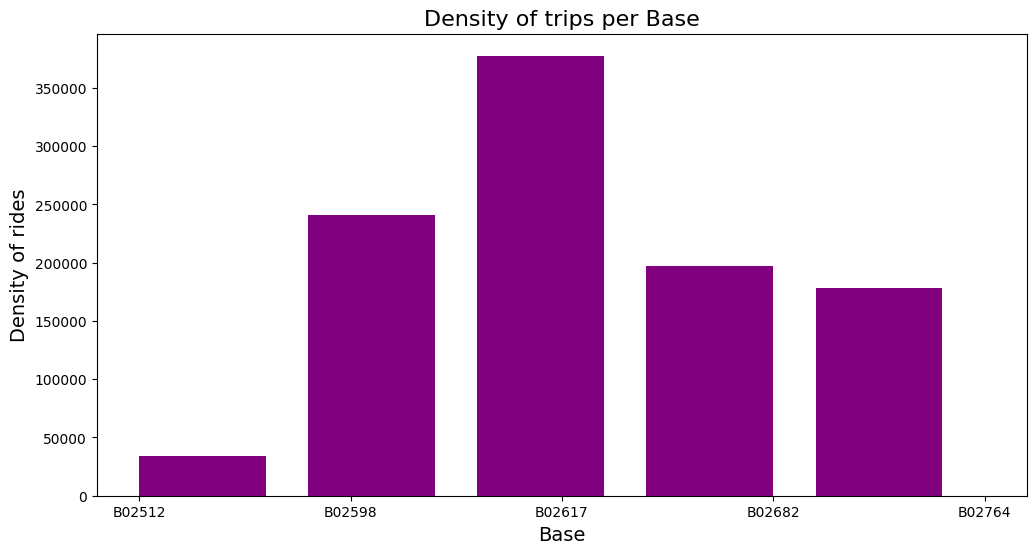

In [11]:
fig,ax = plt.subplots(figsize = (12,6)) #figsize es en inches (puede ser en otra unit aparentemente)
plt.hist(uber_df.Base, width= 0.6, bins= len_bases, color='purple')
plt.title("Density of trips per Base", fontsize=16)
plt.xlabel("Base", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### <i>We can see that the base that performed the best was B02617</i>

## <center> On what days did the Base B02617 perform best? </center>

In [12]:
base = uber_df['Base'] == 'B02617'
uber_df[base].Day

274970     1
274971     1
274972     1
274973     1
274974     1
          ..
652660    30
652661    30
652662    30
652663    30
652664    30
Name: Day, Length: 377695, dtype: int64

Text(0, 0.5, 'Density of rides')

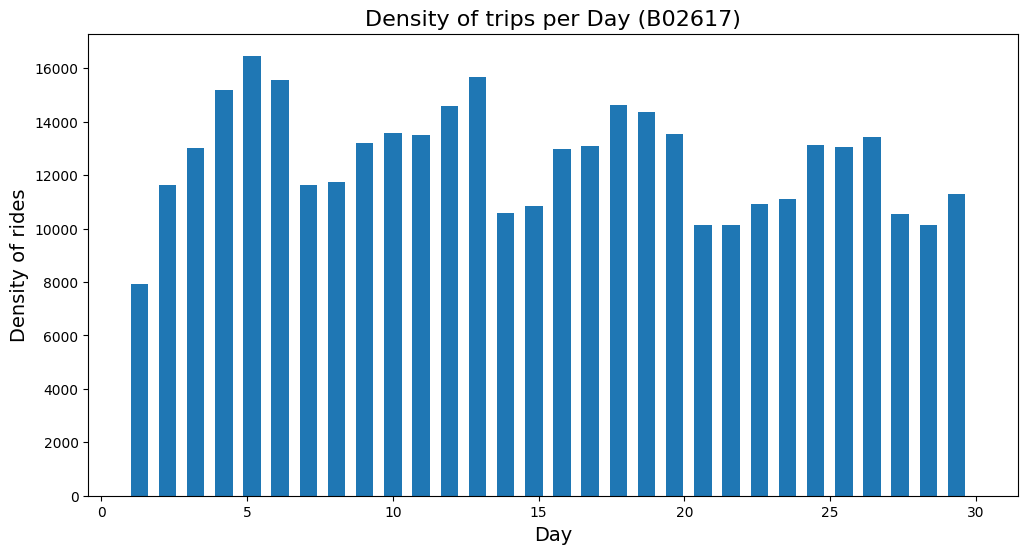

In [13]:
fig,ax = plt.subplots(figsize = (12,6)) #figsize es en inches (puede ser en otra unit aparentemente)
plt.hist(uber_df[base].Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day (B02617)", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

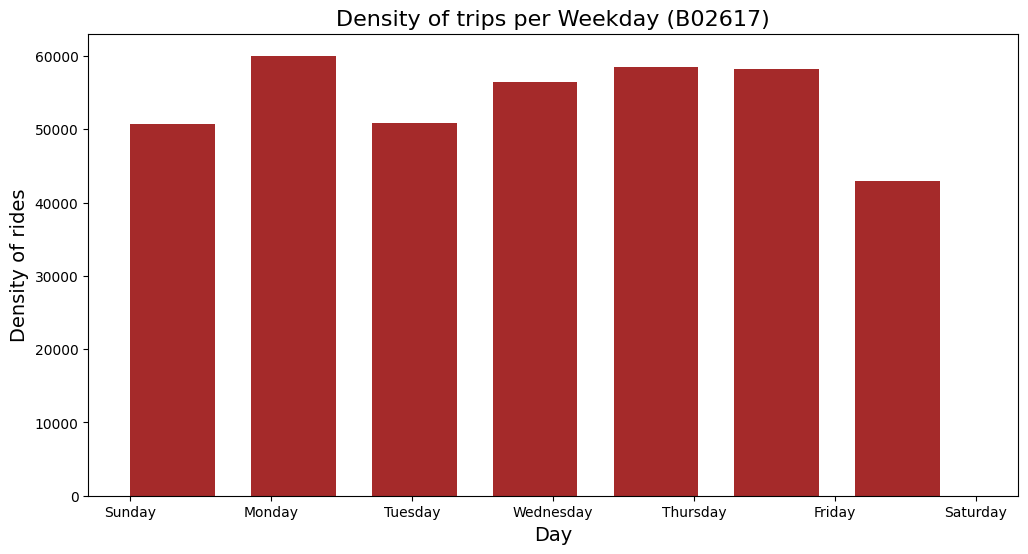

In [14]:
fig,ax = plt.subplots(figsize = (12,6)) #figsize es en inches (puede ser en otra unit aparentemente)
plt.hist(uber_df[base].Weekday, width= 0.6, bins= 7, color='brown')
plt.title("Density of trips per Weekday (B02617)", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
ax.set_xticks(np.arange(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])# Para setear ticks de X

#### <i>We can see that Base B02617 matches the general dataset in that it's most busy day of the week is on Mondays</i>

## <center>Now we can check which Base performed the worst</center>

In [15]:
min_base = uber_df['Base'].value_counts().min()
min_base

np.int64(34370)

In [16]:
mask = uber_df['Base'].value_counts() == min_base
mask

Base
B02617    False
B02598    False
B02682    False
B02764    False
B02512     True
Name: count, dtype: bool

#### <i>From our previous chart on Density per Base, and the operation above, we can conclude that B02512 was the Base that performed the worst </i>

## <center> So let's see B02512's daily numbers </center>

In [17]:
worst_base = uber_df['Base'] == 'B02512'
uber_df[worst_base].Day

0         1
1         1
2         1
3         1
4         1
         ..
34365    30
34366    30
34367    30
34368    30
34369    30
Name: Day, Length: 34370, dtype: int64

Text(0, 0.5, 'Density of rides')

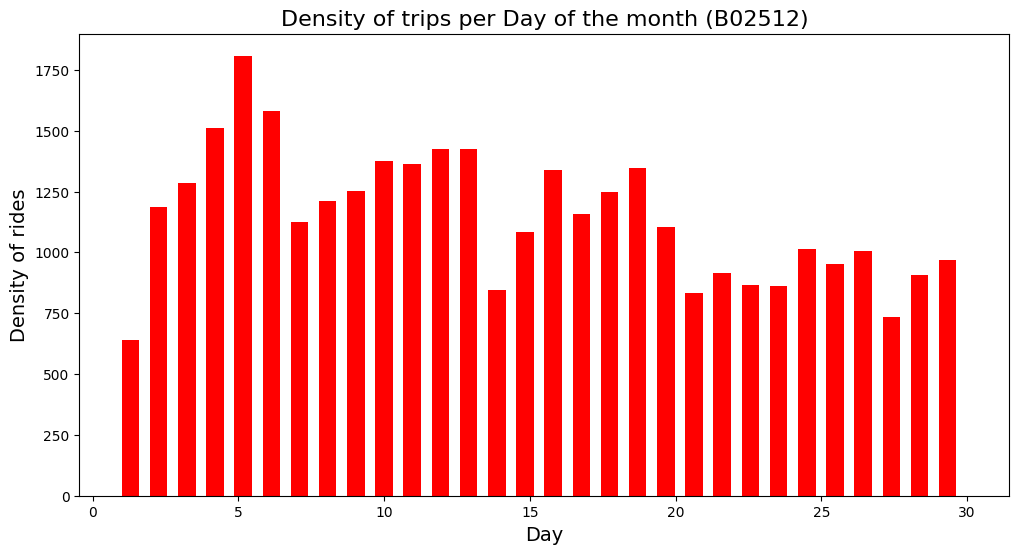

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(uber_df[worst_base].Day, width=0.6, bins=30, color='red')
plt.title("Density of trips per Day of the month (B02512)", fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Density of rides', fontsize=14)


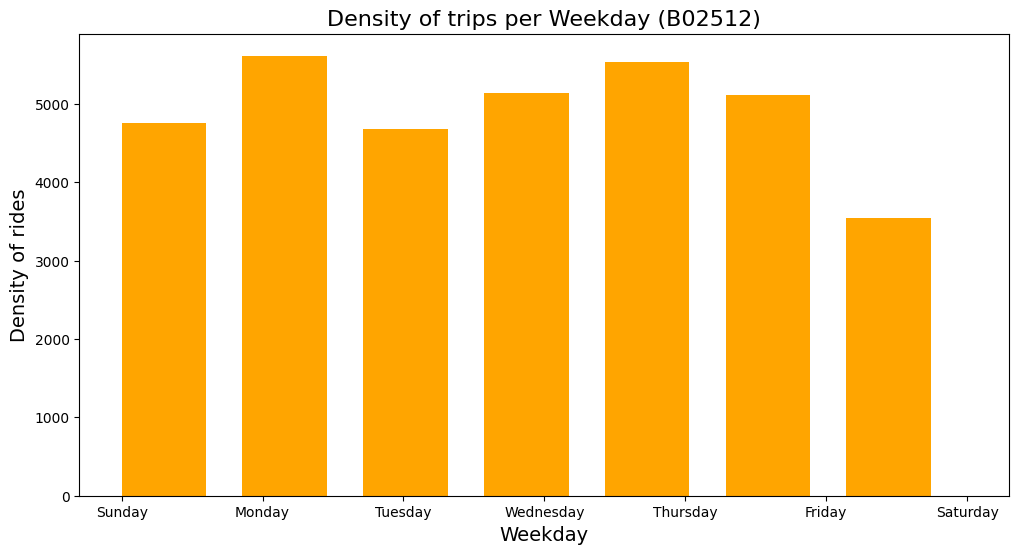

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
plt.hist(uber_df[worst_base].Weekday, width=0.6, bins=7, color='orange')
plt.title('Density of trips per Weekday (B02512)', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Density of rides', fontsize=14)
ax.set_xticks(np.arange(0,7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [24]:
uber_df[worst_base].Weekday.value_counts()

Weekday
1    5615
4    5532
3    5140
5    5115
0    4754
2    4676
6    3538
Name: count, dtype: int64

In [35]:
uber_df[base].Weekday.value_counts()

Weekday
1    60029
4    58472
5    58230
3    56445
2    50821
0    50782
6    42916
Name: count, dtype: int64

In [30]:
60029 / 5615

10.690828138913623

In [32]:
(5615 / 60029) * 100

9.353812324043378

#### On Mondays, Base B02617 did 10.7 times more rides than B02512

- Calcular porcentaje de B02512 sobre B02617
- Calcular cuanto porcentaje sobre el total de rides del data set hizo cada uno

In [44]:
cant_df = uber_df.value_counts().sum()
cant_base1 = uber_df[base].value_counts().sum()
cant_df

np.int64(1028136)

In [46]:
(cant_base1 / cant_df) * 100

np.float64(36.7358987526942)

Base B02617 representa un 36.7% de los rides totales 

In [47]:
cant_base2 = uber_df[worst_base].value_counts().sum()
(cant_base2 / cant_df) * 100

np.float64(3.3429429569628923)

Base B02512 representa un 3.3% de los rides totales